https://pythonprogramming.net/getting-stock-prices-python-programming-for-finance/

In [1]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import style
import seaborn as sns
import pandas as pd
import pandas_datareader.data as web
from plotly import graph_objs as go
import requests


In [2]:
style.use('ggplot')


In [3]:
ticker0 = 'SPCE'
ticker1 = 'MRNA'
ticker2 = 'GILD'
ticker3 = 'TSLA'
ticker4 = 'AMD'
ticker5 = 'INTC'

nasdaq = 'NDAQ'
spy = 'SPY'

start = dt.datetime(2015,1,1)
end = dt.datetime.now()

In [4]:
df0 = web.DataReader(ticker0,"yahoo",start,end)
df1 = web.DataReader(ticker1,"yahoo",start,end)
df2 = web.DataReader(ticker2,"yahoo",start,end)
df3 = web.DataReader(ticker3,"yahoo",start,end)
df4 = web.DataReader(ticker4,"yahoo",start,end)
df5 = web.DataReader(ticker5,"yahoo",start,end)

dfnasdaq = web.DataReader(nasdaq,"yahoo",start,end)
dfspy = web.DataReader(spy,"yahoo",start,end)

In [5]:
df0.head()
df1.head()
df2.head()
df3.head()
df4.head()
df5.head()


High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2015-01-02  37.160000  36.110001  36.669998  36.360001  23605600.0  31.082489
2015-01-05  36.450001  35.939999  36.200001  35.950001  32785000.0  30.732008
2015-01-06  36.230000  35.259998  36.080002  35.279999  30847600.0  30.159252
2015-01-07  36.070000  35.270000  35.639999  36.020000  27725200.0  30.791851
2015-01-08  37.000000  36.259998  36.369999  36.689999  31765400.0  31.364601

In [6]:
df0.reset_index(inplace = True)
df1.reset_index(inplace = True)
df2.reset_index(inplace = True)
df3.reset_index(inplace = True)
df4.reset_index(inplace = True)
df5.reset_index(inplace = True)

df0.set_index("Date", inplace = True)
df1.set_index("Date", inplace = True)
df2.set_index("Date", inplace = True)
df3.set_index("Date", inplace = True)
df4.set_index("Date", inplace = True)
df5.set_index("Date", inplace = True)

In [7]:
#print(df0.head())
#print(df1.head())
#print(df2.head())
#print(df3.head())
#print(df4.head())
#print(df5.head())

Text(0, 0.5, 'Price')

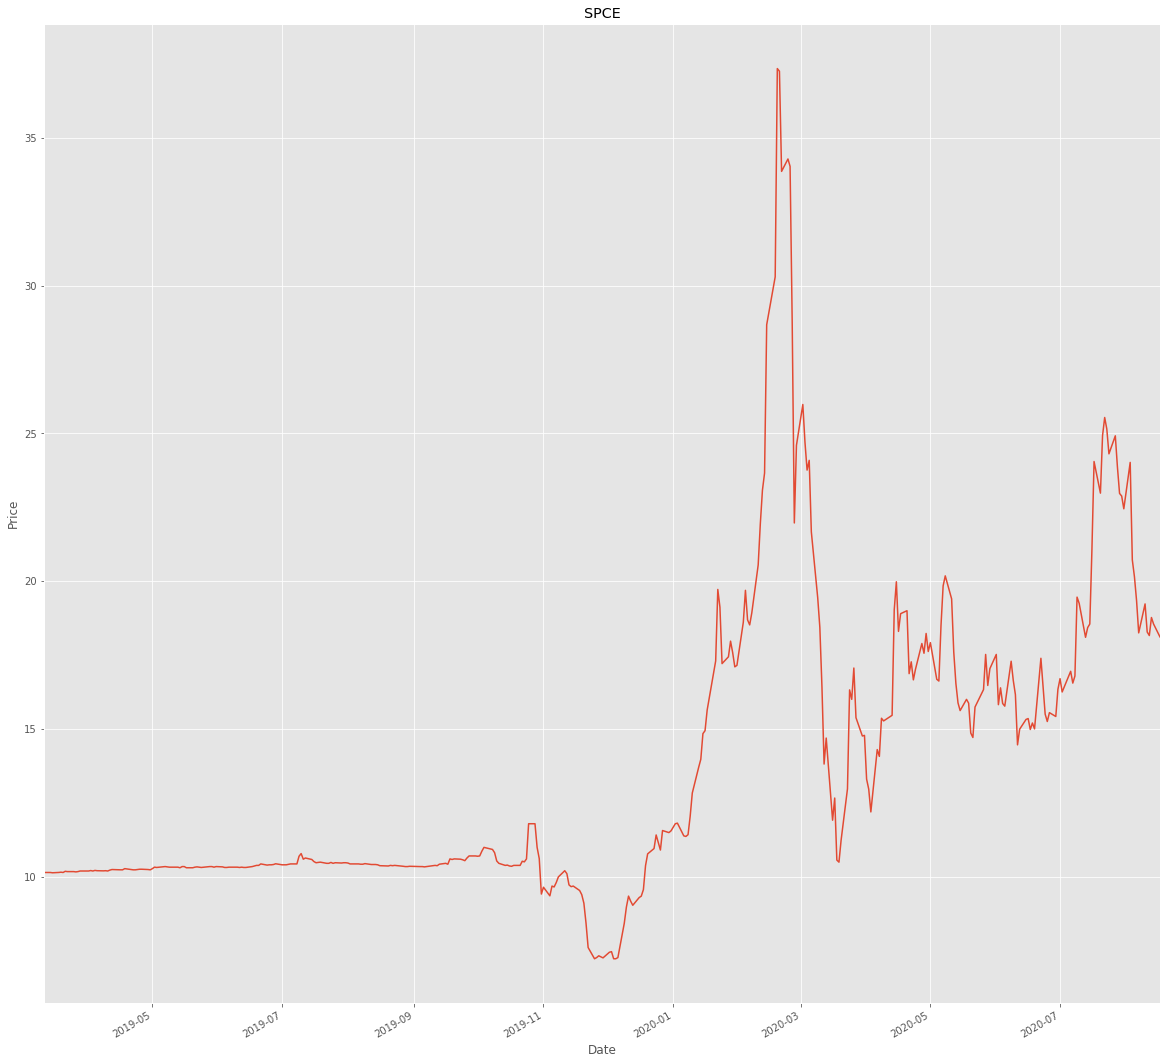

In [8]:
df0['Adj Close'].plot(figsize=(20,20))
plt.title(ticker0)
plt.ylabel('Price')

In [9]:
def setplt(x = 13, y = 9, a = 1, b = 1):
    f, ax = plt.subplots(a,b,figsize = (x,y))
    sns.despine(f, left = True, bottom = True)
    return f, ax

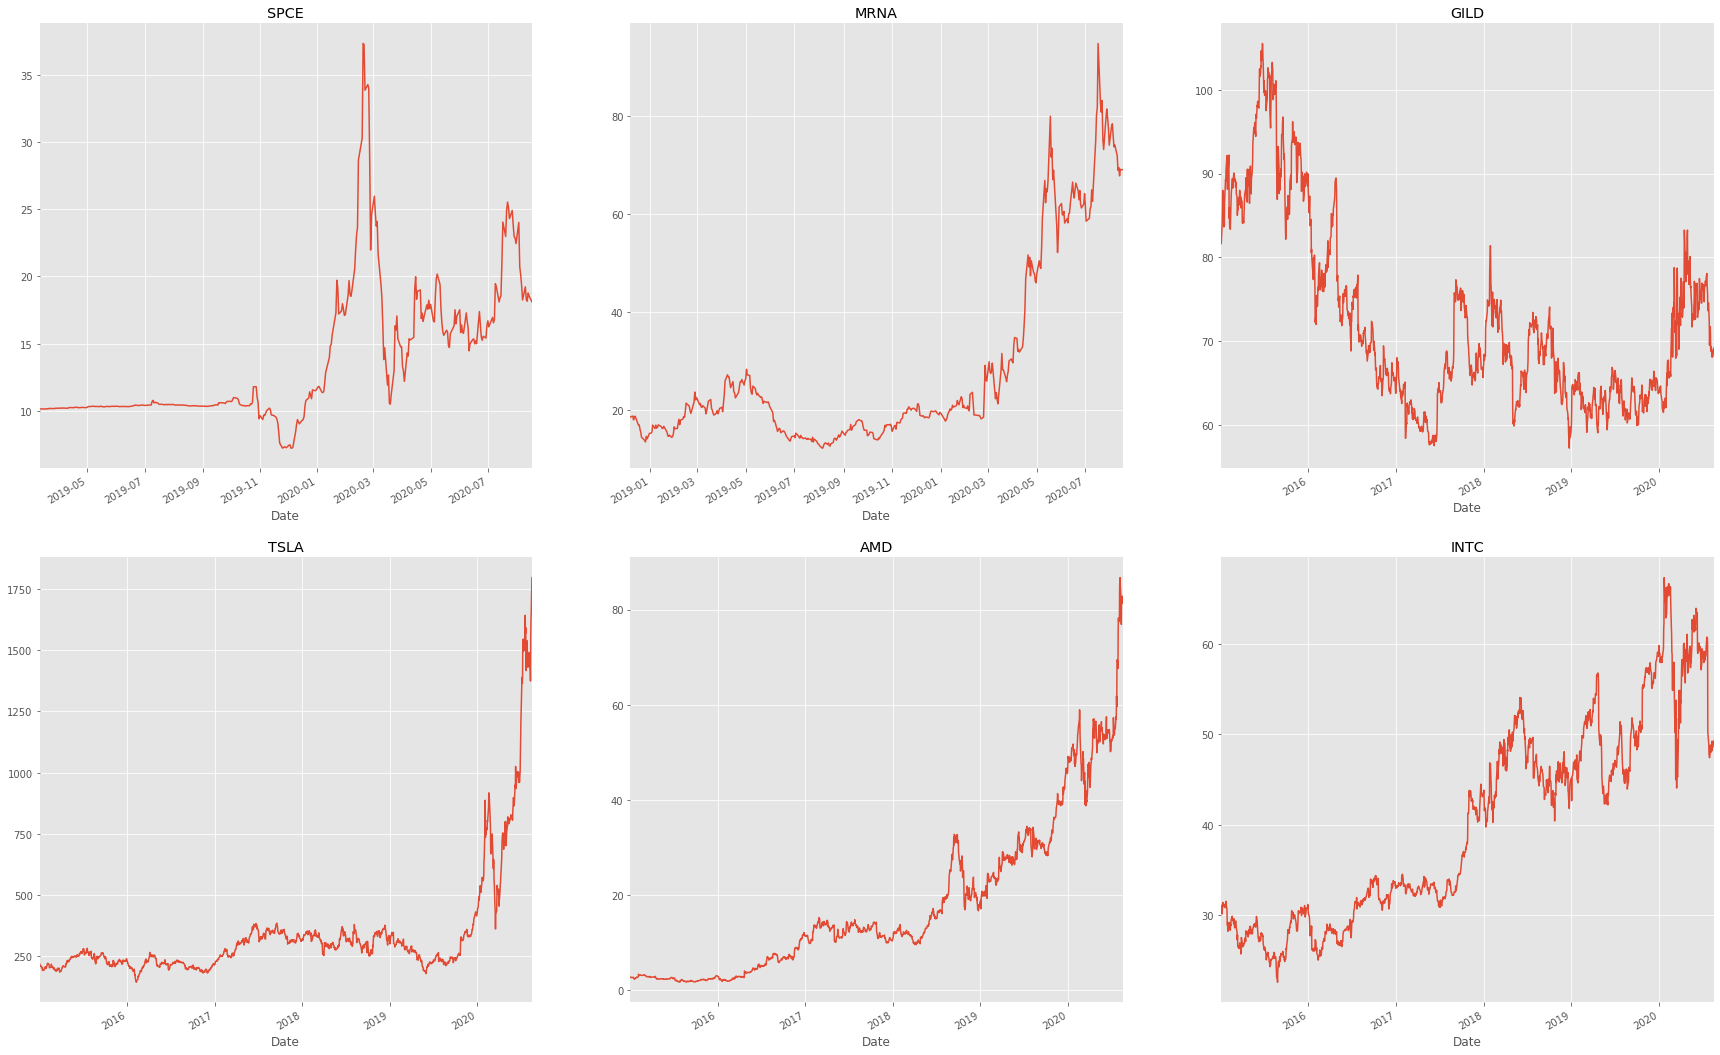

In [10]:
f , ax = setplt(30,20,2,3)

#plotting
v_plot = df0['Adj Close'].plot( title = ticker0, ax = ax[0][0])
v_plot = df1['Adj Close'].plot( title = ticker1 ,ax = ax[0][1])
v_plot = df2['Adj Close'].plot( title = ticker2 ,ax = ax[0][2])
v_plot = df3['Adj Close'].plot( title = ticker3 ,ax = ax[1][0])
v_plot = df4['Adj Close'].plot( title = ticker4 ,ax = ax[1][1])
v_plot = df5['Adj Close'].plot( title = ticker5 ,ax = ax[1][2])

<BarContainer object of 364 artists>

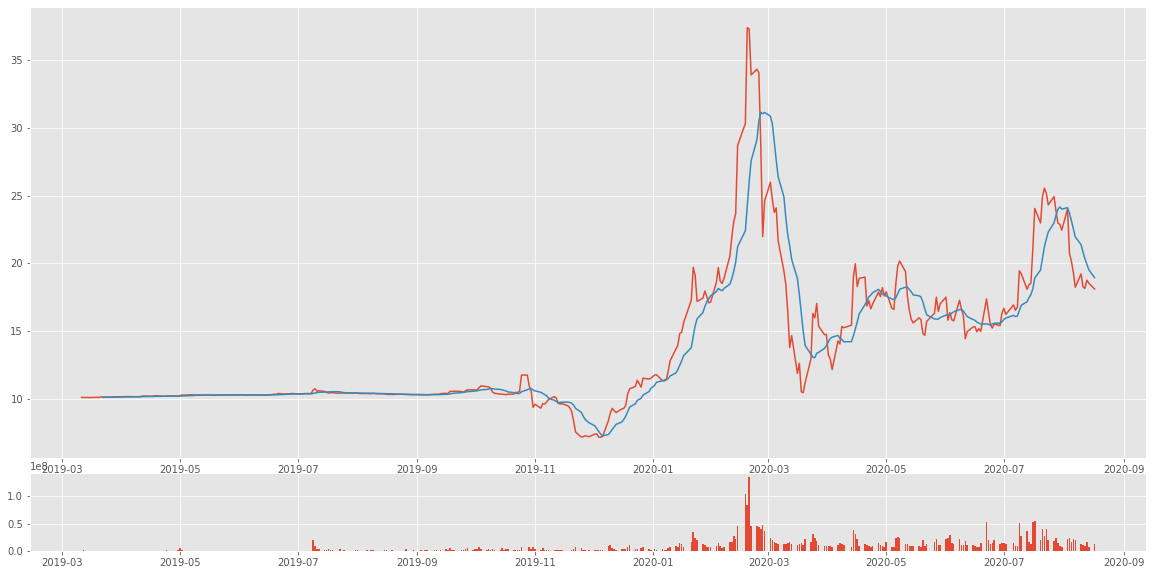

In [11]:
plt.rcParams['figure.figsize'] = (20,10)
ax3 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax4 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax3)

df0['100ma'] = df0['Adj Close'].rolling(window = 10).mean()

ax3.plot(df0['Adj Close'])
ax3.plot(df0['100ma'])
ax4.bar(df0.index,df0['Volume'])

In [12]:
def hundredavevol(df,ttl,ave):
    plt.rcParams['figure.figsize'] = (20,10)
    ax3 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
    ax4 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax3)

    df['100ma'] = df['Adj Close'].rolling(window = ave).mean()
    
    ax3.title.set_text(ttl)
    ax3.plot(df['Adj Close'])
    ax3.plot(df['100ma'])
    ax4.bar(df.index,df['Volume'])

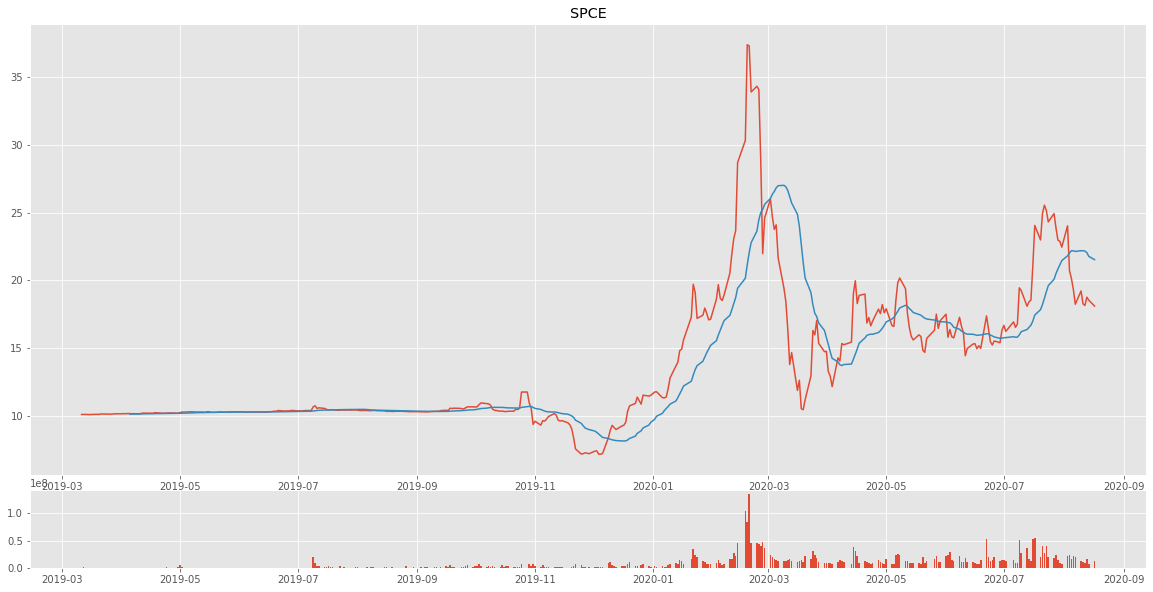

In [13]:
hundredavevol(df0,ticker0,20)

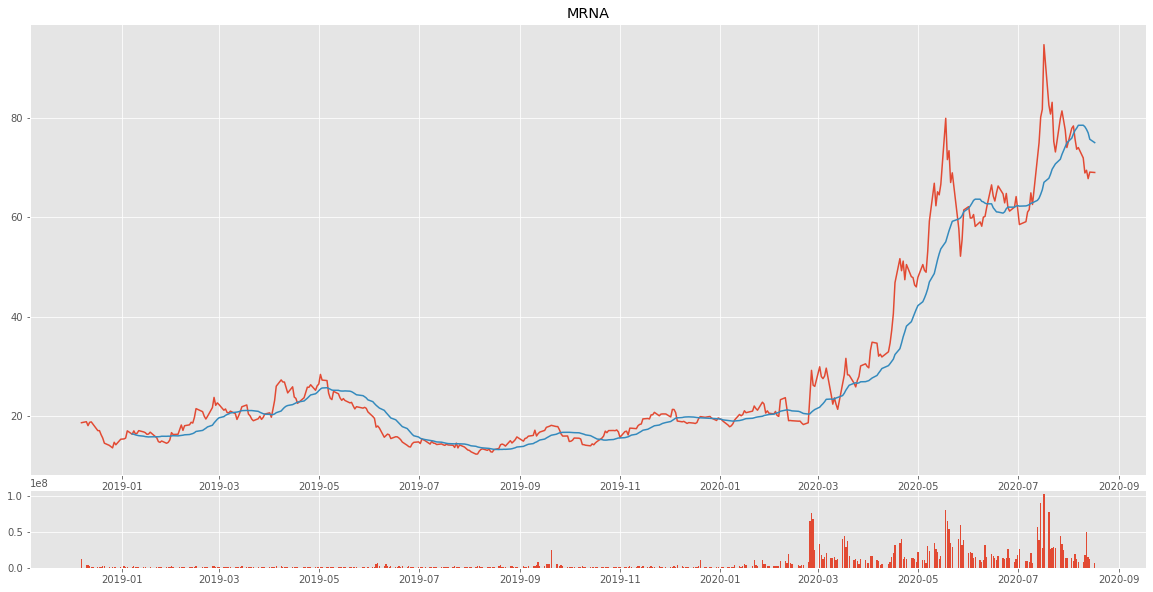

In [14]:
hundredavevol(df1,ticker1,20)

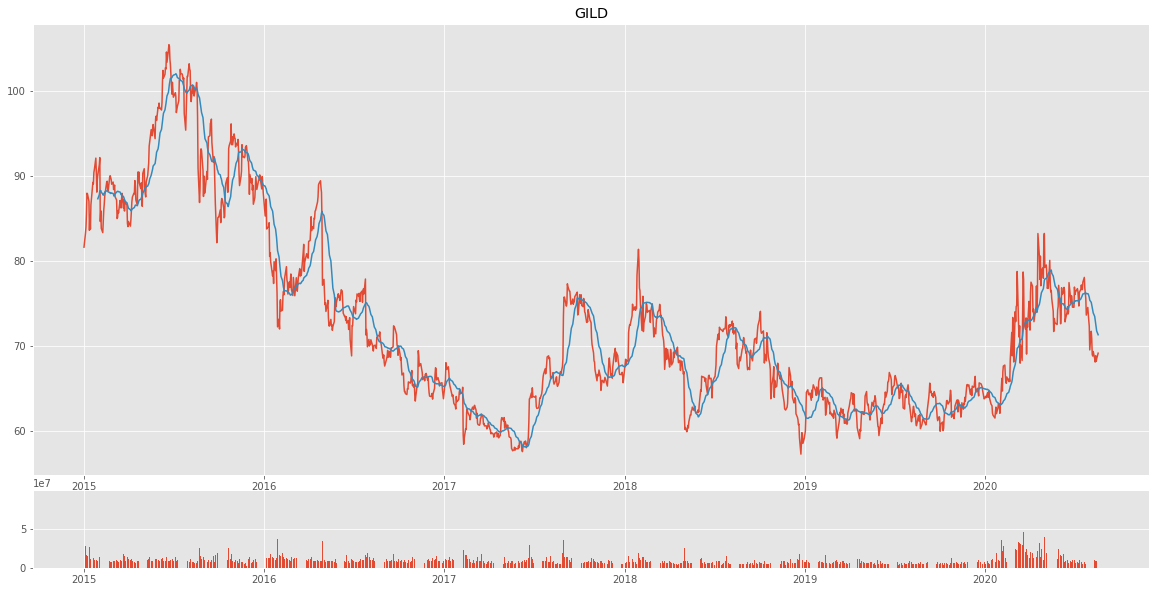

In [15]:
hundredavevol(df2,ticker2,20)

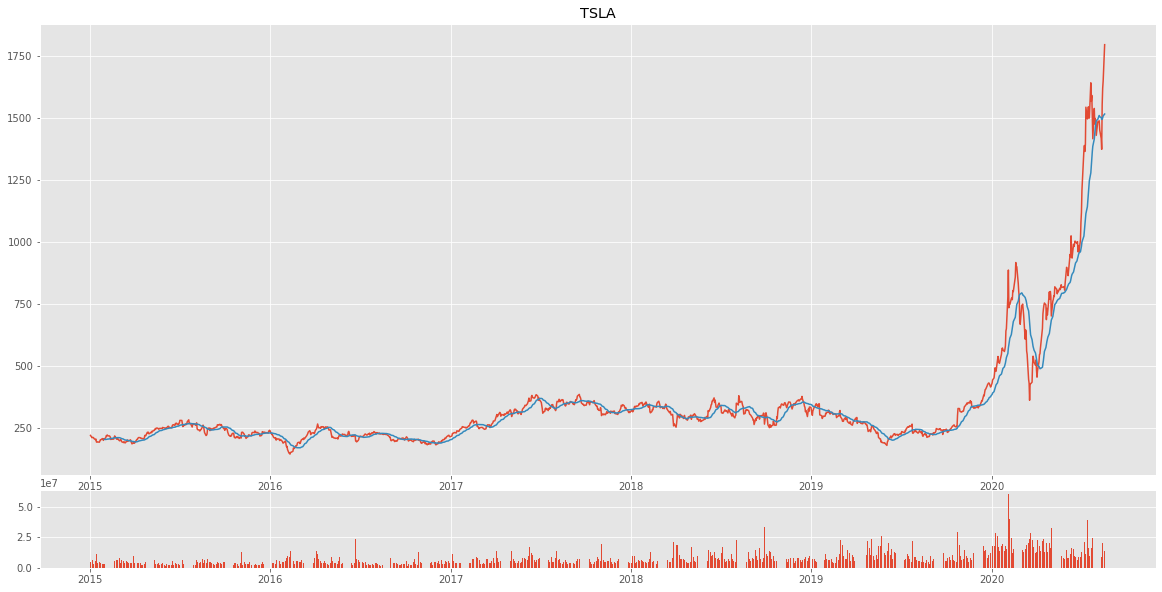

In [16]:
hundredavevol(df3,ticker3,20)

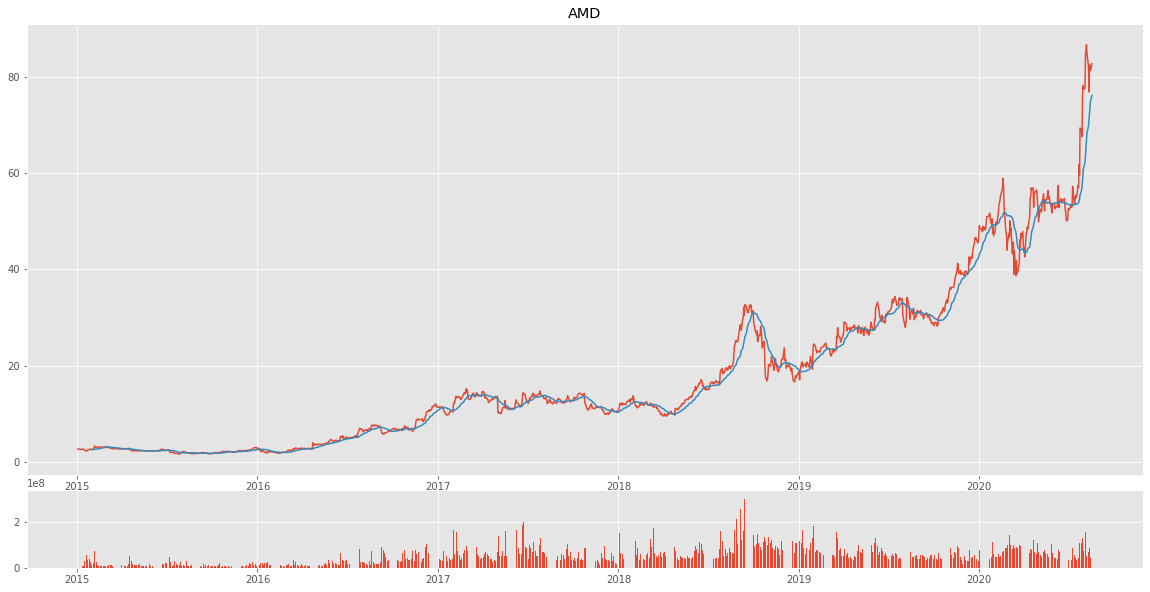

In [17]:
hundredavevol(df4,ticker4,20)

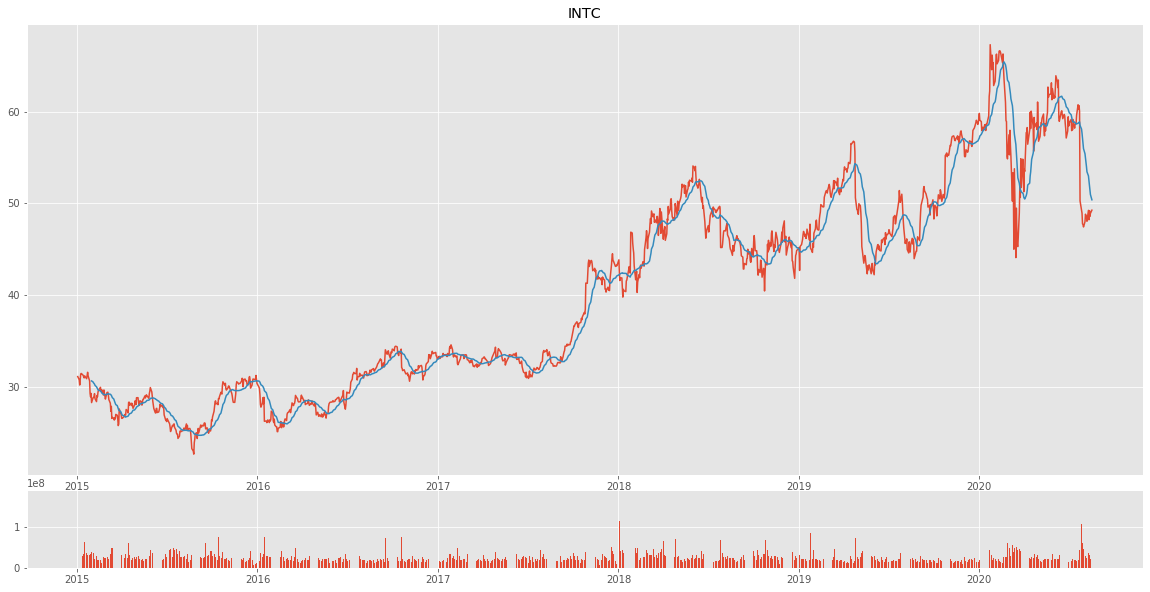

In [18]:
hundredavevol(df5,ticker5,20)

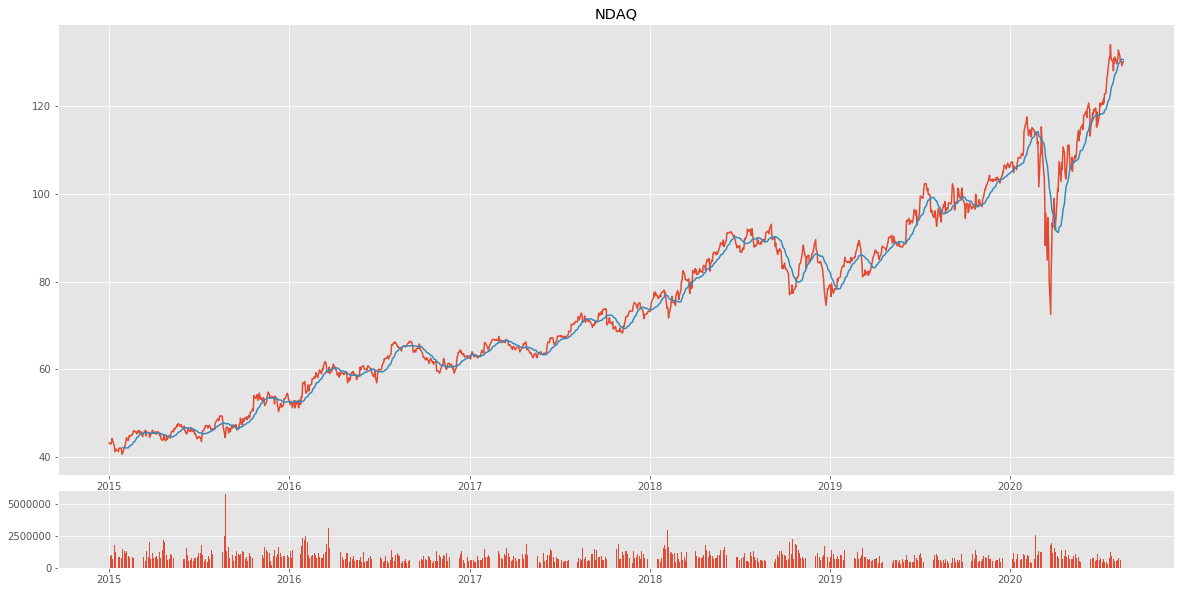

In [19]:
hundredavevol(dfnasdaq,nasdaq,20)

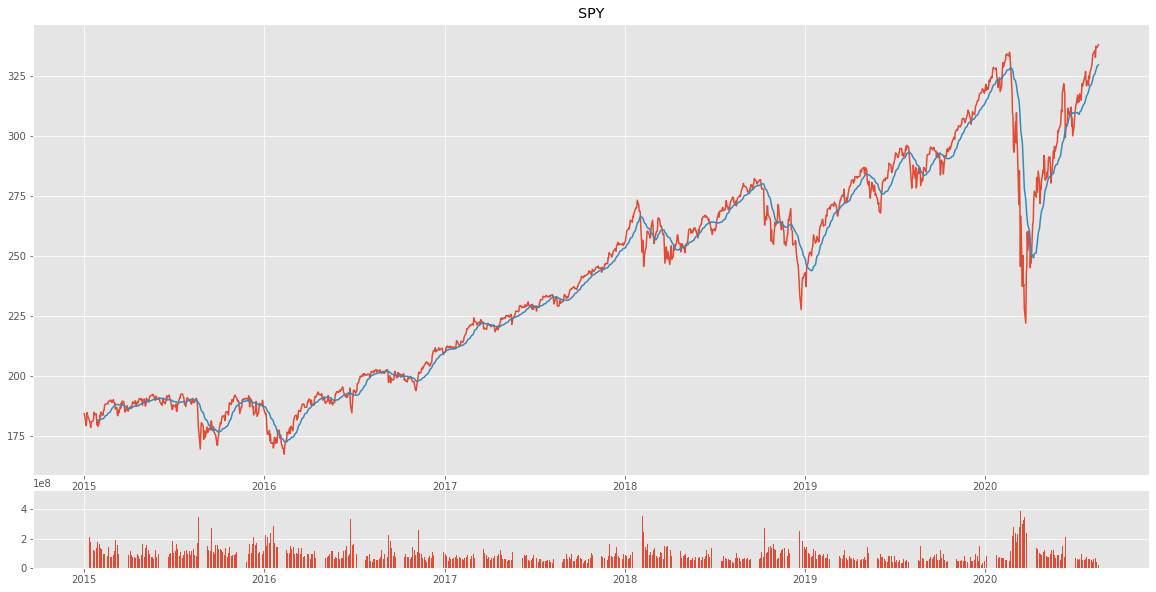

In [20]:
hundredavevol(dfspy,spy,20)

In [21]:
df0.head()

High    Low    Open  Close   Volume  Adj Close  100ma
Date                                                              
2019-03-11  10.16  10.12  10.120  10.14    93300      10.14    NaN
2019-03-12  10.15  10.13  10.150  10.14  1318200      10.14    NaN
2019-03-13  10.14  10.14  10.140  10.14     5000      10.14    NaN
2019-03-14  10.15  10.14  10.144  10.14   176800      10.14    NaN
2019-03-15  10.14  10.13  10.130  10.13   158300      10.13    NaN

In [22]:
df0_ohlc = df0.drop(columns = ['Adj Close','100ma'])
df1_ohlc = df1.drop(columns = ['Adj Close','100ma'])
df2_ohlc = df2.drop(columns = ['Adj Close','100ma'])
df3_ohlc = df3.drop(columns = ['Adj Close','100ma'])
df4_ohlc = df4.drop(columns = ['Adj Close','100ma'])
df5_ohlc = df5.drop(columns = ['Adj Close','100ma'])

In [23]:
df0_ohlc.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume'], dtype='object')

In [24]:
df0_ohlc.reset_index(inplace = True)
df1_ohlc.reset_index(inplace = True)
df2_ohlc.reset_index(inplace = True)
df3_ohlc.reset_index(inplace = True)
df4_ohlc.reset_index(inplace = True)
df5_ohlc.reset_index(inplace = True)

df0_ohlc.set_index("Date", inplace = False)
df1_ohlc.set_index("Date", inplace = False)
df2_ohlc.set_index("Date", inplace = False)
df3_ohlc.set_index("Date", inplace = False)
df4_ohlc.set_index("Date", inplace = False)
df5_ohlc.set_index("Date", inplace = False)

High        Low       Open      Close      Volume
Date                                                              
2015-01-02  37.160000  36.110001  36.669998  36.360001  23605600.0
2015-01-05  36.450001  35.939999  36.200001  35.950001  32785000.0
2015-01-06  36.230000  35.259998  36.080002  35.279999  30847600.0
2015-01-07  36.070000  35.270000  35.639999  36.020000  27725200.0
2015-01-08  37.000000  36.259998  36.369999  36.689999  31765400.0
...               ...        ...        ...        ...         ...
2020-08-11  49.730000  48.060001  49.630001  48.189999  35348100.0
2020-08-12  49.259998  48.240002  48.669998  49.189999  30687200.0
2020-08-13  49.330002  48.389999  49.259998  48.560001  24774500.0
2020-08-14  49.209999  48.650002  48.730000  48.889999  22306100.0
2020-08-17  49.299999  48.730000  49.110001  49.240002  11886786.0

[1416 rows x 5 columns]

In [25]:
def candlesticks(ohlc, tick):
    cs = go.Figure(data = [go.Candlestick( 
                    x = ohlc['Date'],
                    open = ohlc['Open'], 
                    high = ohlc['High'],
                    low = ohlc['Low'], 
                    close = ohlc['Close'])])
    cs.update_layout(title = tick)


    cs.show()

In [26]:
candlesticks(df2_ohlc, ticker2)

In [27]:
dfnasdaq.head()

High        Low       Open      Close     Volume  Adj Close  \
Date                                                                           
2015-01-02  48.410000  47.419998  48.220001  47.860001   596100.0  43.198997   
2015-01-05  47.910000  47.259998  47.619999  47.610001   955600.0  42.973339   
2015-01-06  47.980000  47.160000  47.759998  47.580002  1034700.0  42.946259   
2015-01-07  48.279999  47.320000  47.889999  48.259998   990800.0  43.560036   
2015-01-08  49.330002  48.439999  48.490002  49.009998  1205600.0  44.237000   

            100ma  
Date               
2015-01-02    NaN  
2015-01-05    NaN  
2015-01-06    NaN  
2015-01-07    NaN  
2015-01-08    NaN

In [28]:
"""
plt.plot(df0['Adj Close']+92)
plt.plot(df5['Adj Close']+47)
plt.plot(dfnasdaq['Adj Close'])
"""

"\nplt.plot(df0['Adj Close']+92)\nplt.plot(df5['Adj Close']+47)\nplt.plot(dfnasdaq['Adj Close'])\n"

**The Machine Learning Part**

from sklearn.model_selection import train_test_split #module for splitting training data and test data
from sklearn.linear_model import LinearRegression

train, test = train_test_split(dfnasdaq, test_size = 0.20)

#plt.plot(df0['Adj Close'])

print(len(train))
print(len(dfnasdaq['Close']))

print(len(dfnasdaq['Close']))
print(len(dfnasdaq.index))

#Converting Date to Number of days
n_days = [i for i in range(len(dfnasdaq.index))]
#print(n_days)

#X_train = np.array(train.index).reshape(-1,1)
X_train = np.array(n_days).reshape(-1,1)
y_train = train['Close']

print(len(X_train))
print(len(y_train))

dfnasdaq.head()

#create LinearRegression Object
model = LinearRegression()
#Fitting the model
model.fit(X_train,y_train)

#Coefficient
print('Slope = ', np.asscalar(np.squeeze(model.coef_)))
#Intercept
print('Intercept = ', model.intercept_)

plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

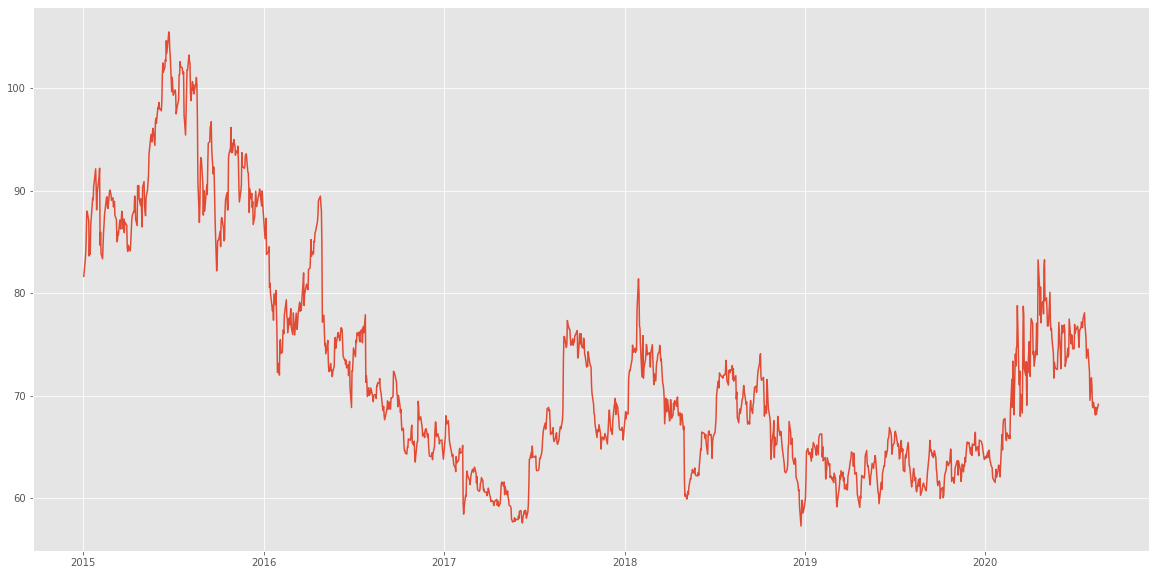

In [38]:
plt.plot(df2['Adj Close'])